<a href="https://colab.research.google.com/github/PHAMDANGKIEUOANH/data-analytics/blob/main/titanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data-Pre-Processing(Tiền xử lý dữ liệu)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab/data-science-main/data-science-main/Code/P01_Pre_Processing/Data.csv")

In [ ]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
# Data Imputation (Missing Data Replacement-Dữ liệu bị mất- Bước này ta sẽ thay thế những dữ liệu bị mất của data)
# NaN : nghĩa là Not a Number
data_df.info() # H ta sẽ xem thông tin về data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
# Ở trên ta thấy cột Age và Salary bị thiếu mất một dữ liệu nên bây h ta sẽ bắt đầu tính missing data
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()     # h ta sẽ tính coi có bao nhiều missing _data bằng câu lệnh isna()
    missing_percent = missing_data/len(data_df) * 100  #Bay h khi đã biết được có bao nhiều cột bị thiếu dữ liệu ta sẽ tính phần trăm bằng cách lấy missing_data chia cho độ dài dataset(10 row)
    print(f"Columns: {col}: has {missing_percent}% missing_data")

Columns: Country: has 0.0% missing_data
Columns: Age: has 10.0% missing_data
Columns: Salary: has 10.0% missing_data
Columns: Purchased: has 0.0% missing_data


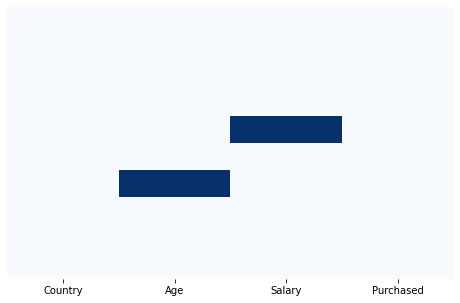

In [ ]:
# Nếu dữ liệu bạn quá lớn có thể trực quan hóa dữ liệu để thuận tiện xem
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False);   # Vì không cần cột dọc để thực hiện so sách dữ liệuta cso thể xóa nó đi

In [ ]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
# O day ta khong lap cot cuoi nen ta se loai bo no ra
X = data_df.iloc[:,:-1].values

In [ ]:
X # thuong thi doanh ngiep khong muon de du lieu cua minh o dang datafame nen ta nen chuyen ve dạng numpy ở đay ta them ".values" vào
# thì sẽ hiện như sau

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
Y = data_df.iloc[:,-1].values # Y o day ta la cot cuoi cung ma o X ta da bo ra

In [ ]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer # thu vien nay de them vào vac du lieu da bi mat

# Create an instance of class SimpleImpure: np.nan is the empty value in the dataset(nan o day chinh la NaN, "strategy" la gia tri trung binh cua cacs values de buf vao NaN )
impute = SimpleImputer(missing_values= np.nan, strategy="mean")

impute.fit(X[:, 1:3])   # them du lieu vua chinh vao data (X) cua ban
X[:, 1:3] = impute.transform(X[:, 1:3])

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
# Incode categorical Data (ma hoa du lieu)

# Incode Independent Variable (o cot tren do chinh la "France",....)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
X = ct.fit_transform(X)

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
# Incode dependent Variable (o day la cac du lieu trong cot Y)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# splitting the dataset (X = data, Y = output) into the training set and Test set
from sklearn.model_selection import train_test_split
np.random.seed(42) # mac dinh de data duoc tach ra giong nhau 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [ ]:
X # hay doi chieu voi X_train de biet duoc doan cot tren cach lay data cua no ra sao

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
Y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
data_df # hay doi chieu tu X_train sang Y_train khi nhin vao cot data_df ban dau

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [ ]:
Y_test

array([0, 1])

In [ ]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Ta thay rang o cot tuoi va luong gia tri 2 cot nay chech lech nau rat lon trong khi tuoi co 27 ma luon thif 48000 thi cot salary qua ap dao
# Cho nen ta se sai (Feature Scaling)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

In [ ]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [ ]:
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)

In [ ]:
# House Price Predicion Project
# 1. Problem Definition: (Goal) predict the sales price for each house
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab/home-data-for-ml-course/train.csv")

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# O day ta thay data cua ta co cot id roi thi khong can cot phia truoc nua nen ta se loai bo nhu sau:
data = pd.read_csv("/content/drive/MyDrive/Colab/home-data-for-ml-course/train.csv", index_col = "Id")

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# de biet duoc data cua ta co nhung cot nao ta lam nhu sau(de hieu duocc y nghia cua nhung csi ten sau ta nen search tren kaggle)
data.columns

# LotArea : dien tich cua mot manh dat
# YearBuilt: nam xay dung( nha da xay tu lau thi gia cang thap)
# 1stFlrSF: dien tich lau 1 la bao nhieu
# 2ndFlrSF: dien tich lau 2 la bao nhieu
# FullBath: tong so phong tam
# BedroomAbvGr: tong phong ngu dat tieu chuan
# TotRmsAbvGrd: tong so phong 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
# Feature Selection( choose the feature to train the model)
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

In [ ]:
# Sliptting dataset into X and y
X = data[features]

In [ ]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


In [ ]:
y = data["SalePrice"]

In [ ]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [ ]:
# h ta se tach dataset cua ta thanh 2 phan X_train, y_train vaf X_valid, y_valid
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0) # nho them ham random_state = 0 de khi lay thi du lieu lay khong bi thay doi lien tuc


In [ ]:
X_train.shape

(1168, 7)

In [ ]:
X.shape

(1460, 7)

In [ ]:
data.shape

(1460, 80)

In [ ]:
X_valid.shape

(292, 7)

In [ ]:
# Training Machine Learning Model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 1)

In [ ]:
# fit_training data into model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_predict = dt_model.predict(X_valid.head())

In [ ]:
y_predict

array([335000., 140200., 119000., 207500., 112000.])

In [ ]:
pd.DataFrame({'y' : y_valid.head(), 'y_predict': y_predict}) # day chinh la gia nha du doan cua mo hinh chung ta lam
# ta thay gia tri cung gan giong

,y,y_predict
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=1)

In [ ]:
rf_val_predict = rf_model.predict(X_valid)

In [ ]:
rf_val_predict[:5]

array([271690., 155039., 122024., 188915.,  91147.])

In [ ]:
X_valid.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
530,32668,1957,2515,0,3,4,9
492,9490,1941,958,620,1,3,5
460,7015,1950,979,224,1,3,5
280,10005,1977,1156,866,2,4,8
656,1680,1971,525,567,1,3,6


In [ ]:
# Predict with a new input
rf_model.predict([[6969, 2021, 1000, 800, 4, 5, 8]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([206158.4])

In [ ]:
# Model Envaluation (du doan ti le chinh xac)
# Project Titanic - Machine Learning from Disaster
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# doc file
train_df = pd.read_csv("/content/drive/MyDrive/Colab/titanic/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab/titanic/test.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# sibsp: # of siblings / spouses aboard the Titanic
# parch:	# of parents / children aboard the Titanic
# ticket:	Ticket number
# cabin:	Cabin number

# O day ta thay data cua ta co cot id roi thi khong can cot phia truoc nua nen ta se loai bo nhu sau:
train_df = pd.read_csv("/content/drive/MyDrive/Colab/titanic/train.csv", index_col = "PassengerId")

In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab/titanic/test.csv", index_col = "PassengerId")

In [ ]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Categorical(bien phan loai) va Numerical(bien so)
train_df.info()
# Ta thay at du Pclass o day la bien so nhunng ta chi co 3 so la 1, 2, 3 nen trong truong hop nay no la bien phan loai
# Viec ta xem thong tin cua data chi mang tinh chat tham khao
# O day co tat ca 891 dong nhung cung co nhung dong missing data nhu age: 714, cabin: 204, Emnarked: 889

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
test_df.info()
# o day ta co 418 cot va age: 332, Fare: 417, Cabin: 91

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [ ]:
# o day nhung bien la categorical: Survived, Pclass, Sex, SibSp, Parch, Embarked
# Nhung bien la numberrical: Age, Fare, 
# Mix type data: Ticket, Cabin
# Contain Error/typo: Name
# Black or Null: Cabin, Age, Embarked
# Various data type : String, Int, Float

# Bay h de doi int64 sang categorical ta lam nhu sau
train_df["Survived"] = train_df["Survived"].astype("category")

In [ ]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [ ]:
# Bay h de chuyen tung cot vay rat lau neu ta co the lam cach sau:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def converted_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category") 
converted_cat(train_df, features)
converted_cat(test_df, features)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [ ]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [ ]:
# Exploratory Data Analysis(EDA): phan tich du lieu
# O tren ta co cac categorical Survived, Pclass, Sex, SibSp, Parch, Embarked
# Dau tien hay cing phan tich target variable: "Survived"
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [ ]:
# De biet duoc so phan tram nguoi song sot ta lam nhu sau
train_df["Survived"].value_counts(normalize = True).to_frame()
# Hien h ta thay du lieu cua ta khong bi chenh lech nhieu lam, co nhieu truong hop khac du lieu chenh lech rat lon

,Survived
0,0.616162
1,0.383838


In [ ]:
# Sex
train_df["Sex"].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


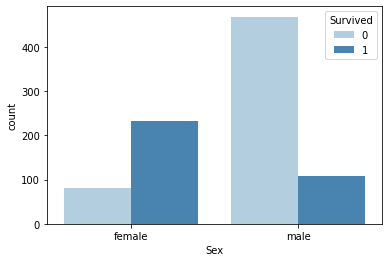

In [ ]:
# Tiep theo ta sai seaborn de thay duoc du lieu cua ta "countplot" o day de dem so hanh khach nam va so hanh khach nu
# Ta co the thay doi mau do ti bang "palette"
# Roi ta them du lieu cot Survived vao bang cach sai "hue"
# O day ta thay cot Survived cua nu cao ho nam rat nhieu boi vi khi tai nan say ra ben nuoc ngoai ho da uu tien cho nu
# vi vay kha nang song sot cua phu nu va tre em la cao hon
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette = 'Blues');

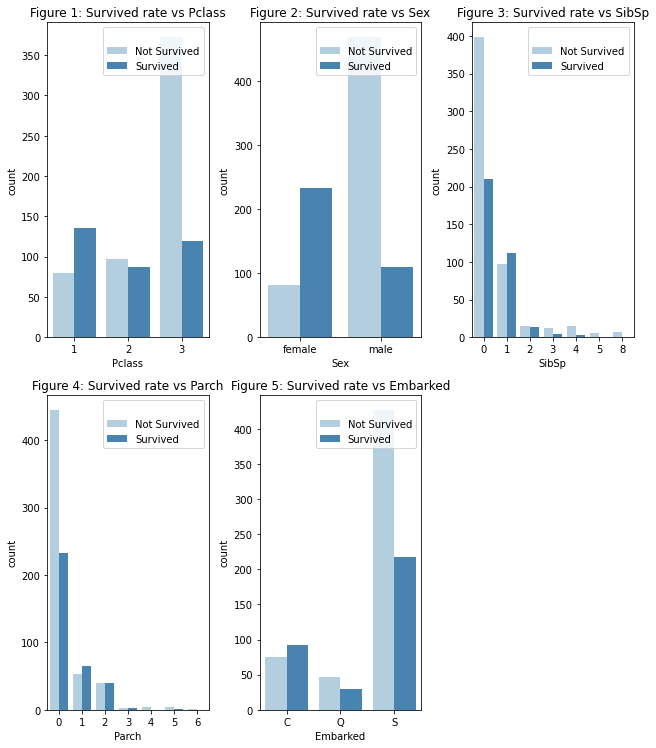

In [ ]:
# Remaining Categorical Feature Columns 
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize =(n_rows *4.5, n_cols *3.5))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax [r,c] 
      sns.countplot(data = train_df, x = cols[i], hue = "Survived", palette="Blues", ax =ax_i)
      ax_i.set_title(f"Figure {i + 1}: Survived rate vs {cols[i]}")
      ax_i.legend(title = ' ', loc = 'upper right', labels = ['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) # khi khong muon co cot trong nhu hinh so 6 ta cos the bo
plt.tight_layout()
plt.show()

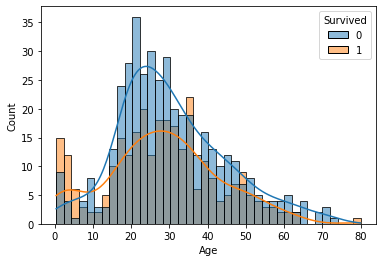

In [ ]:
# EDA Numerical Feature
# Age , Fare
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', bins = 40, kde = True);

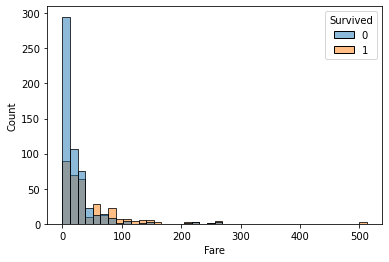

In [ ]:
# Fare
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 40);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


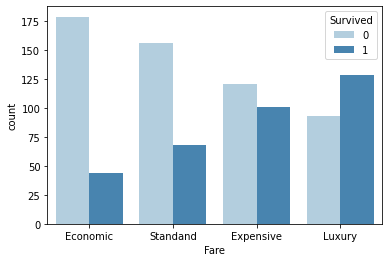

In [ ]:
# Neu ta de do thi nhu tren thi rat kho nhin ne ta se chia nho do thi ra
fare_categories = ['Economic', 'Standand', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)

sns.countplot(quartile_data, hue = train_df['Survived'], palette = 'Blues');

In [ ]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
# Feature Engineering & Data Wrangling
# Name
train_df['Name'].tail()

PassengerId
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [ ]:
import re

def extract_title(name):
  p = re.compile(r", (\w+)\.")
  if p.search(name) is None:
    print(name)
  # return p.search(name).groups(1)[0].strip()

train_df['Name'].apply(lambda name: extract_title(name))

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)


PassengerId
1      None
2      None
3      None
4      None
5      None
       ... 
887    None
888    None
889    None
890    None
891    None
Name: Name, Length: 891, dtype: object

In [ ]:
import re

def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")

  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
#Ở đây ta thấy rằng có hàng Mrs. martin .... vẫn chưa hợp lí với câu lệnh ta đã làm nên h ta sẽ kiểm tra lại
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']
# Ở đây ta thấy ràng hàm của ta đã có thay đôi như sau (sài regex101) , (\w+)\.
# Sau khi sửa xong ta sẽ thấy hàm trở thành the countess

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [ ]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [ ]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

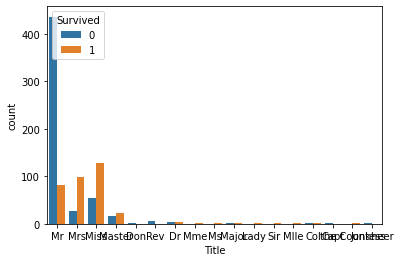

In [ ]:
sns.countplot(data=train_df, x='Title', hue='Survived');

In [ ]:
# Ở trên các cot co du lieu hoi it ta co the group no lai
def group_title(title):
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title
  elif title == "Ms":
    return "Miss"
  else:
    return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

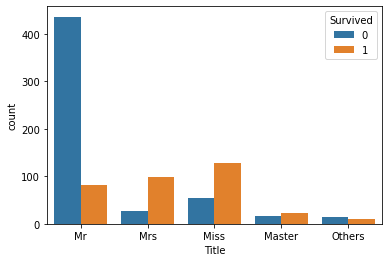

In [ ]:
sns.countplot(data=train_df, x = 'Title', hue = 'Survived');

In [ ]:
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [ ]:
# Family (SibSp, Parch)
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [ ]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [ ]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

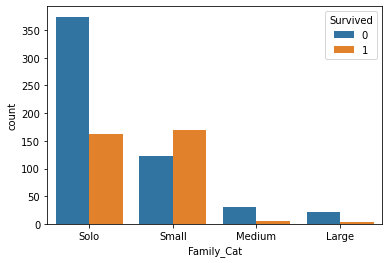

In [ ]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

In [ ]:
# Data Wrangling
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [ ]:
def display_missing(df, feature_cols):
  n_row = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      print(f"{col} has {missing_count * 100 / n_rows:.2f}% missing value.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 8850.00% missing value.
Embarked has 100.00% missing value.
Age has 4300.00% missing value.
Fare has 50.00% missing value.


In [ ]:
# Filling missing value 
# Age 
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(['Age'])

In [ ]:
age_by_sex_pclass

Age      Fare  Family_Size
Sex    Pclass                             
female 1       35.0  82.66455          2.0
       2       28.0  22.00000          2.0
       3       21.5  12.47500          2.0
male   1       40.0  41.26250          1.0
       2       30.0  13.00000          1.0
       3       25.0   7.92500          1.0

In [ ]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 100.00% missing value.
Fare has 50.00% missing value.


In [ ]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [ ]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformers = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformers = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformers, num_features),
    ('cat', cat_transformers, cat_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
X = preprocessor.transform(X)

In [ ]:
X_test = preprocessor.transform(X_test)

In [ ]:
# Model training 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
X_test.shape

(418, 19)

In [ ]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8044692737430168

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7910447761194029, 0.7162162162162162)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [ ]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val, y_val)

0.7877094972067039

In [ ]:
# decision tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [ ]:
decision_tree.score(X_val, y_val)

0.7932960893854749

In [ ]:
#Cross_validation
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [ ]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [ ]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [ ]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)